In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torch.optim as optim
import torch.nn.functional as F

import os

In [3]:
root_dir = "/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = root_dir + "/train"
valid_dir = root_dir + "/valid"
test_dir = "/kaggle/input/new-plant-diseases-dataset/test"
classes = os.listdir(train_dir)

In [4]:
print(f"There are {len(classes)} classes")
print(classes)

There are 38 classes
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)', 'Raspberry___healthy', 'Tomato___

In [5]:
lens = []
for disease in classes:
    print(f"The number of images in {disease} is {len(os.listdir(train_dir + '/' + disease))}")
    lens.append(len(os.listdir(train_dir + '/' + disease))) 

The number of images in Tomato___Late_blight is 1851
The number of images in Tomato___healthy is 1926
The number of images in Grape___healthy is 1692
The number of images in Orange___Haunglongbing_(Citrus_greening) is 2010
The number of images in Soybean___healthy is 2022
The number of images in Squash___Powdery_mildew is 1736
The number of images in Potato___healthy is 1824
The number of images in Corn_(maize)___Northern_Leaf_Blight is 1908
The number of images in Tomato___Early_blight is 1920
The number of images in Tomato___Septoria_leaf_spot is 1745
The number of images in Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot is 1642
The number of images in Strawberry___Leaf_scorch is 1774
The number of images in Peach___healthy is 1728
The number of images in Apple___Apple_scab is 2016
The number of images in Tomato___Tomato_Yellow_Leaf_Curl_Virus is 1961
The number of images in Tomato___Bacterial_spot is 1702
The number of images in Apple___Black_rot is 1987
The number of images in 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


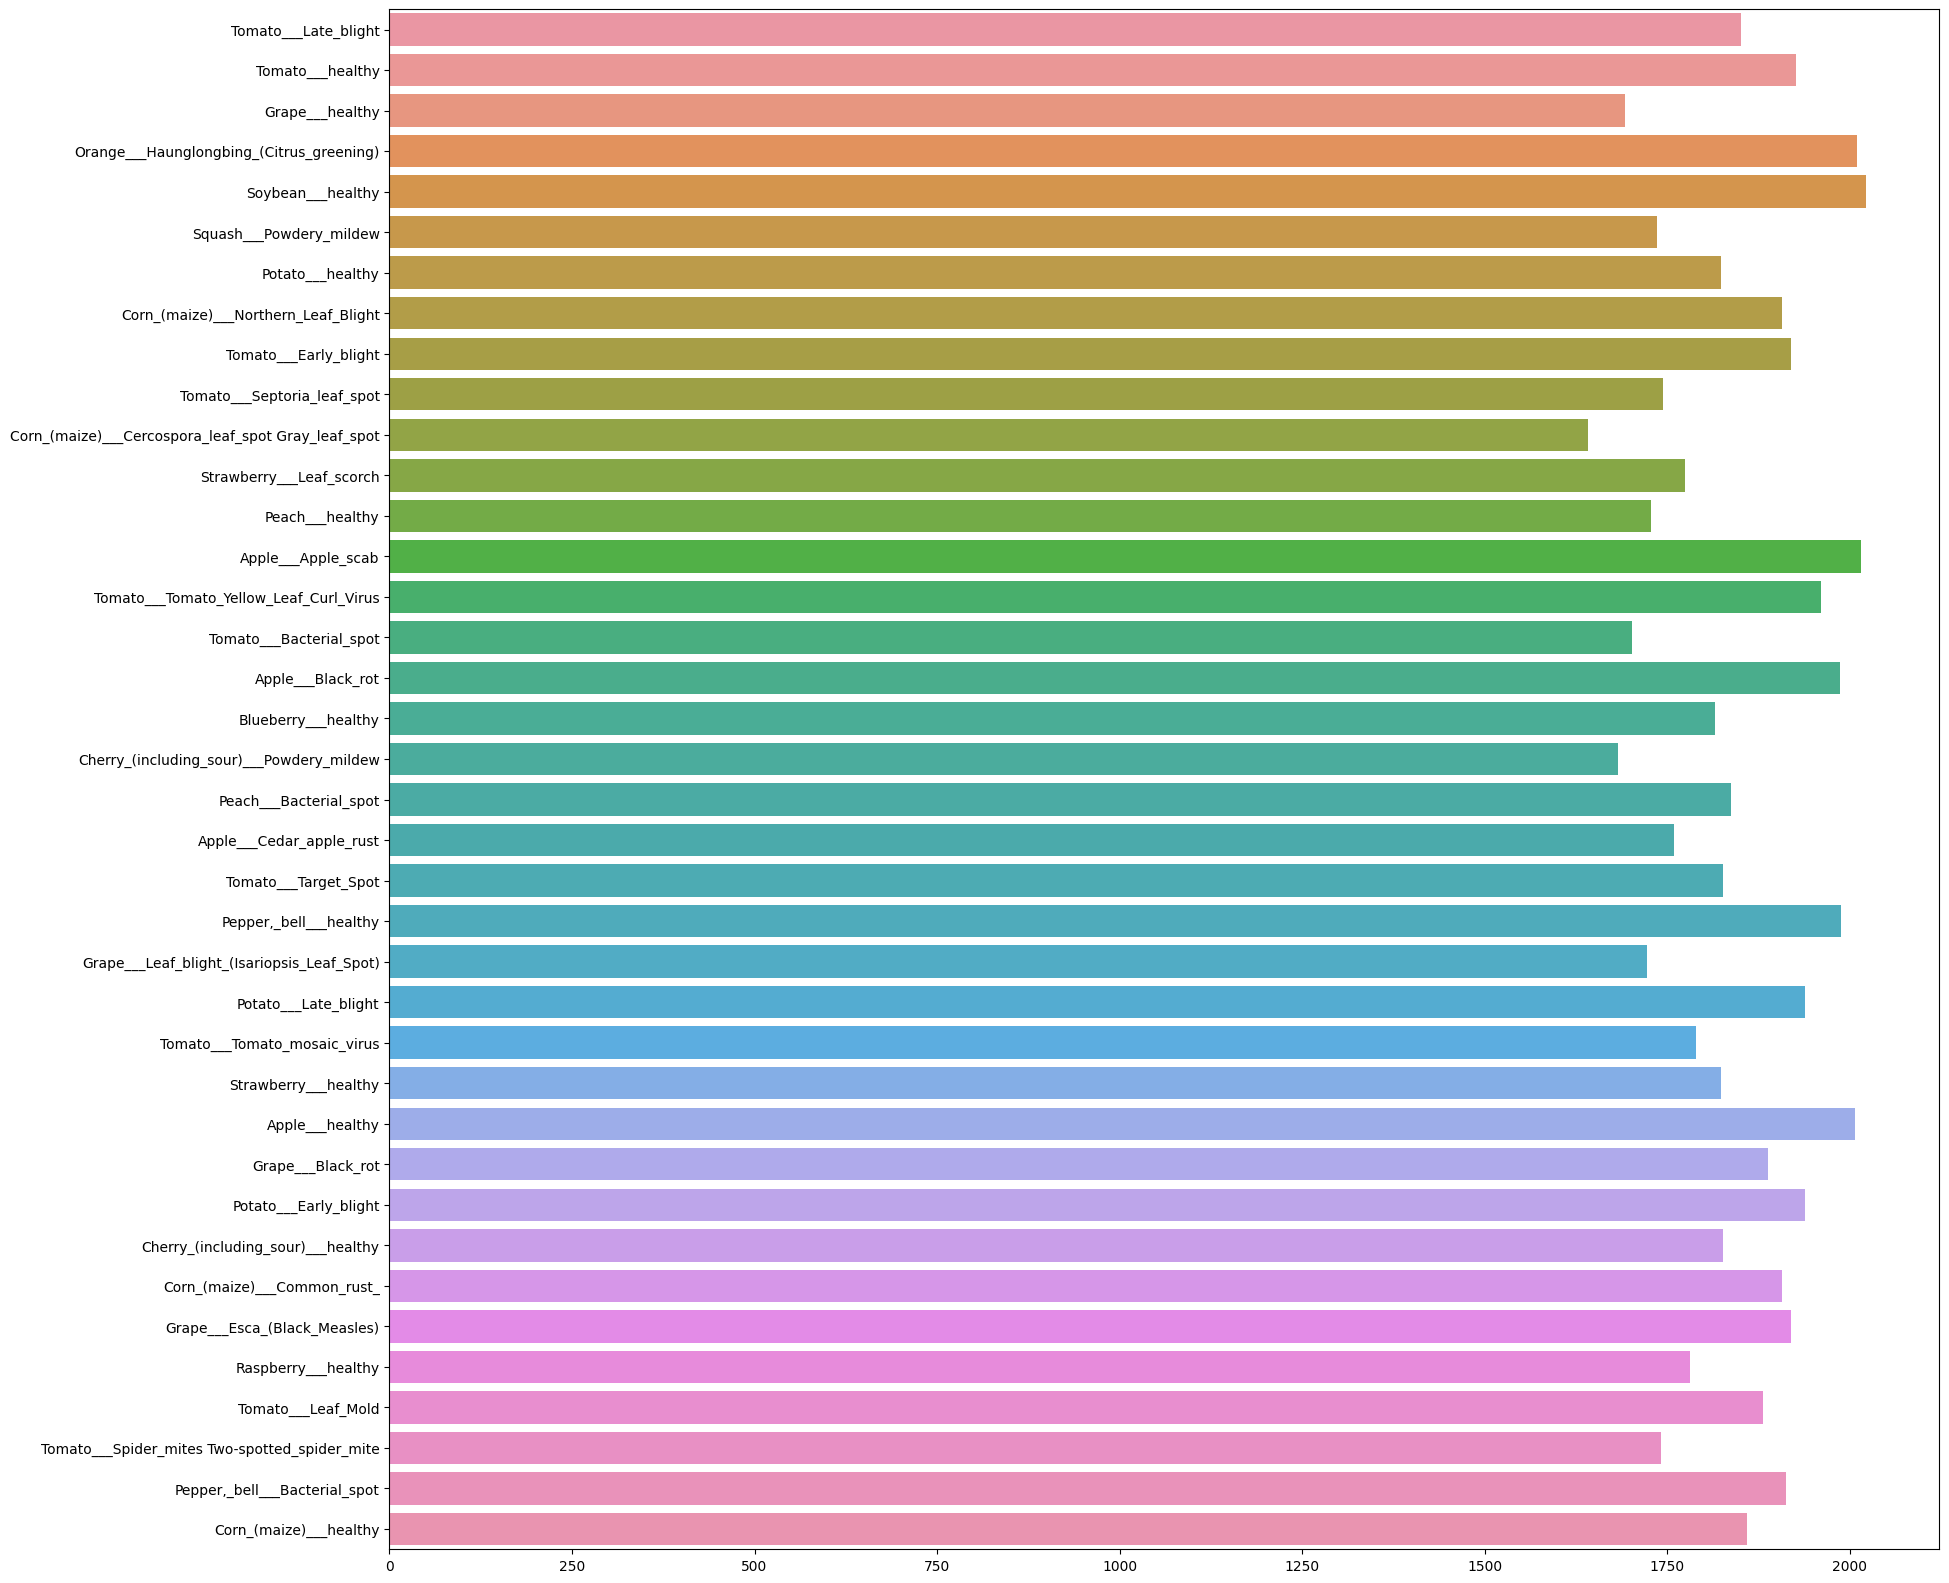

In [6]:
plt.figure(figsize=(20,20))
ax = sns.barplot(x=lens, y=classes)
plt.xticks()
plt.yticks()
plt.show()

In [7]:
train = ImageFolder(train_dir, transform=transforms.ToTensor())
valid = ImageFolder(valid_dir, transform=transforms.ToTensor())

In [8]:
train

Dataset ImageFolder
    Number of datapoints: 70295
    Root location: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
    StandardTransform
Transform: ToTensor()

In [9]:
valid

Dataset ImageFolder
    Number of datapoints: 17572
    Root location: /kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
    StandardTransform
Transform: ToTensor()

In [10]:
train[0]

(tensor([[[0.6549, 0.6510, 0.6471,  ..., 0.7255, 0.7176, 0.7098],
          [0.6667, 0.6627, 0.6588,  ..., 0.7294, 0.7216, 0.7176],
          [0.6667, 0.6627, 0.6588,  ..., 0.7373, 0.7294, 0.7255],
          ...,
          [0.3922, 0.4000, 0.4078,  ..., 0.4941, 0.4941, 0.4941],
          [0.3961, 0.4000, 0.4039,  ..., 0.4784, 0.4824, 0.4824],
          [0.4078, 0.4039, 0.4000,  ..., 0.4745, 0.4784, 0.4824]],
 
         [[0.6392, 0.6353, 0.6314,  ..., 0.7137, 0.7059, 0.6980],
          [0.6510, 0.6471, 0.6431,  ..., 0.7176, 0.7098, 0.7059],
          [0.6510, 0.6471, 0.6431,  ..., 0.7255, 0.7176, 0.7137],
          ...,
          [0.3529, 0.3608, 0.3686,  ..., 0.4314, 0.4314, 0.4314],
          [0.3569, 0.3608, 0.3647,  ..., 0.4157, 0.4196, 0.4196],
          [0.3686, 0.3647, 0.3608,  ..., 0.4118, 0.4157, 0.4196]],
 
         [[0.7686, 0.7647, 0.7608,  ..., 0.8275, 0.8196, 0.8118],
          [0.7804, 0.7765, 0.7725,  ..., 0.8314, 0.8235, 0.8196],
          [0.7804, 0.7765, 0.7725,  ...,

In [11]:
img, label = train[0]
print("Image shape:", img.shape)

Image shape: torch.Size([3, 256, 256])


Label :Apple___Apple_scab(0)
Label :Apple___Black_rot(1)
Label :Apple___Cedar_apple_rust(2)
Label :Blueberry___healthy(4)
Label :Cherry_(including_sour)___healthy(6)
Label :Corn_(maize)___Common_rust_(8)
Label :Tomato___Septoria_leaf_spot(32)
Label :Tomato___healthy(37)


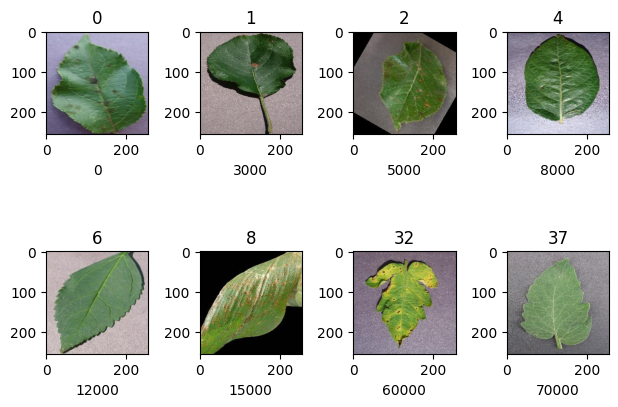

In [12]:
def show_image(image, label):
    print("Label :" + train.classes[label] + "(" + str(label) + ")")
    plt.imshow(image.permute(1, 2, 0))
    
    
image_list = [0, 3000, 5000, 8000, 12000, 15000, 60000, 70000]
    
chs = 0
for img in image_list:
    chs += 1
    plt.subplot(2,4,chs)
    plt.tight_layout()
    plt.xlabel(img,fontsize=10)
    plt.title(train[img][1])
    show_image(*train[img])

In [13]:
batch_size = 32

In [14]:
train_dataloader = DataLoader(train, batch_size, shuffle=True, num_workers=2, pin_memory=True)
valid_dataloader = DataLoader(valid, batch_size, num_workers=2, pin_memory=True)

In [15]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

In [16]:
# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [17]:
# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dataloader, device):
        self.dataloader = dataloader
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dataloader:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dataloader)

In [18]:
device = get_default_device()
device

device(type='cuda')

In [19]:
# Moving data into GPU, WrappedDataLoader
train_dataloader = DeviceDataLoader(train_dataloader, device)
valid_dataloader = DeviceDataLoader(valid_dataloader, device)

In [20]:
# for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [21]:
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [22]:
# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

In [23]:
# resnet architecture 
class CNN_NeuralNet(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) 
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        
        self.conv3 = ConvBlock(128, 256, pool=True) 
        self.conv4 = ConvBlock(256, 512, pool=True)
        #self.conv5 = ConvBlock(256, 256, pool=True)
        #self.conv6 = ConvBlock(256, 512, pool=True)
        #self.conv7 = ConvBlock(512, 512, pool=True)
        
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                       nn.Flatten(),
                                       nn.Linear(512, num_diseases))
        
    def forward(self, x): # x is the loaded batch
        out = self.conv1(x)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        #out = self.conv5(out)
        #out = self.conv6(out)
        #out = self.conv7(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [24]:
# defining the model and moving it to the GPU
# 3 is number of channels RGB, len(train.classes()) is number of diseases.
model = to_device(CNN_NeuralNet(3, len(train.classes)), device) 
model

CNN_NeuralNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inpl

In [25]:
# for training
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [26]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [27]:
def fit_OneCycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0,
                grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []  #For collecting the results
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # scheduler for one cycle learniing rate
    #Sets the learning rate of each parameter group according to the 1cycle learning rate policy. 
    #The 1cycle policy anneals the learning rate from an initial learning rate to some 
    #maximum learning rate and then from that maximum learning rate to some minimum learning rate
    #much lower than the initial learning rate. 
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr,
                                                epochs=epochs, steps_per_epoch=len(train_loader))
    
    
    for epoch in range(epochs):
        # Training
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # gradient clipping
            #Clip the gradients of an iterable of parameters at specified value.
            #All from pytorch documantation.
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            optimizer.step()
            optimizer.zero_grad()
            
            # recording and updating learning rates
            lrs.append(get_lr(optimizer))
            sched.step()
             # validation
        
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

In [28]:
%%time
history = [evaluate(model, valid_dataloader)]
history

CPU times: user 1min 16s, sys: 5.59 s, total: 1min 22s
Wall time: 1min 14s


[{'val_loss': 3.638577461242676, 'val_acc': 0.027272727340459824}]

In [29]:
num_epoch = 5
lr_rate = 0.01
grad_clip = 0.15
weight_decay = 1e-4
optims = torch.optim.Adam

In [30]:
%%time
history += fit_OneCycle(num_epoch, lr_rate, model, train_dataloader, valid_dataloader, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=optims)

Epoch [0], train_loss: 0.7047, val_loss: 1.1784, val_acc: 0.6699
Epoch [1], train_loss: 0.3242, val_loss: 0.6162, val_acc: 0.8027
Epoch [2], train_loss: 0.2296, val_loss: 0.1430, val_acc: 0.9513
Epoch [3], train_loss: 0.1039, val_loss: 0.0553, val_acc: 0.9823
Epoch [4], train_loss: 0.0247, val_loss: 0.0207, val_acc: 0.9931
CPU times: user 48min 17s, sys: 45min 3s, total: 1h 33min 21s
Wall time: 1h 30min 3s


In [35]:
val_acc = []
val_loss = []
train_loss = []

for i in history:
    val_acc.append(i['val_acc'])
    val_loss.append(i['val_loss'])
    train_loss.append(i.get('train_loss'))

/tmp/ipykernel_31/2922434780.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epoch_count, train_loss, 'r--', color= 'orangered')
/tmp/ipykernel_31/2922434780.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_count, val_loss, '--bo',color= 'green', linewidth = '2.5', label='line with marker')


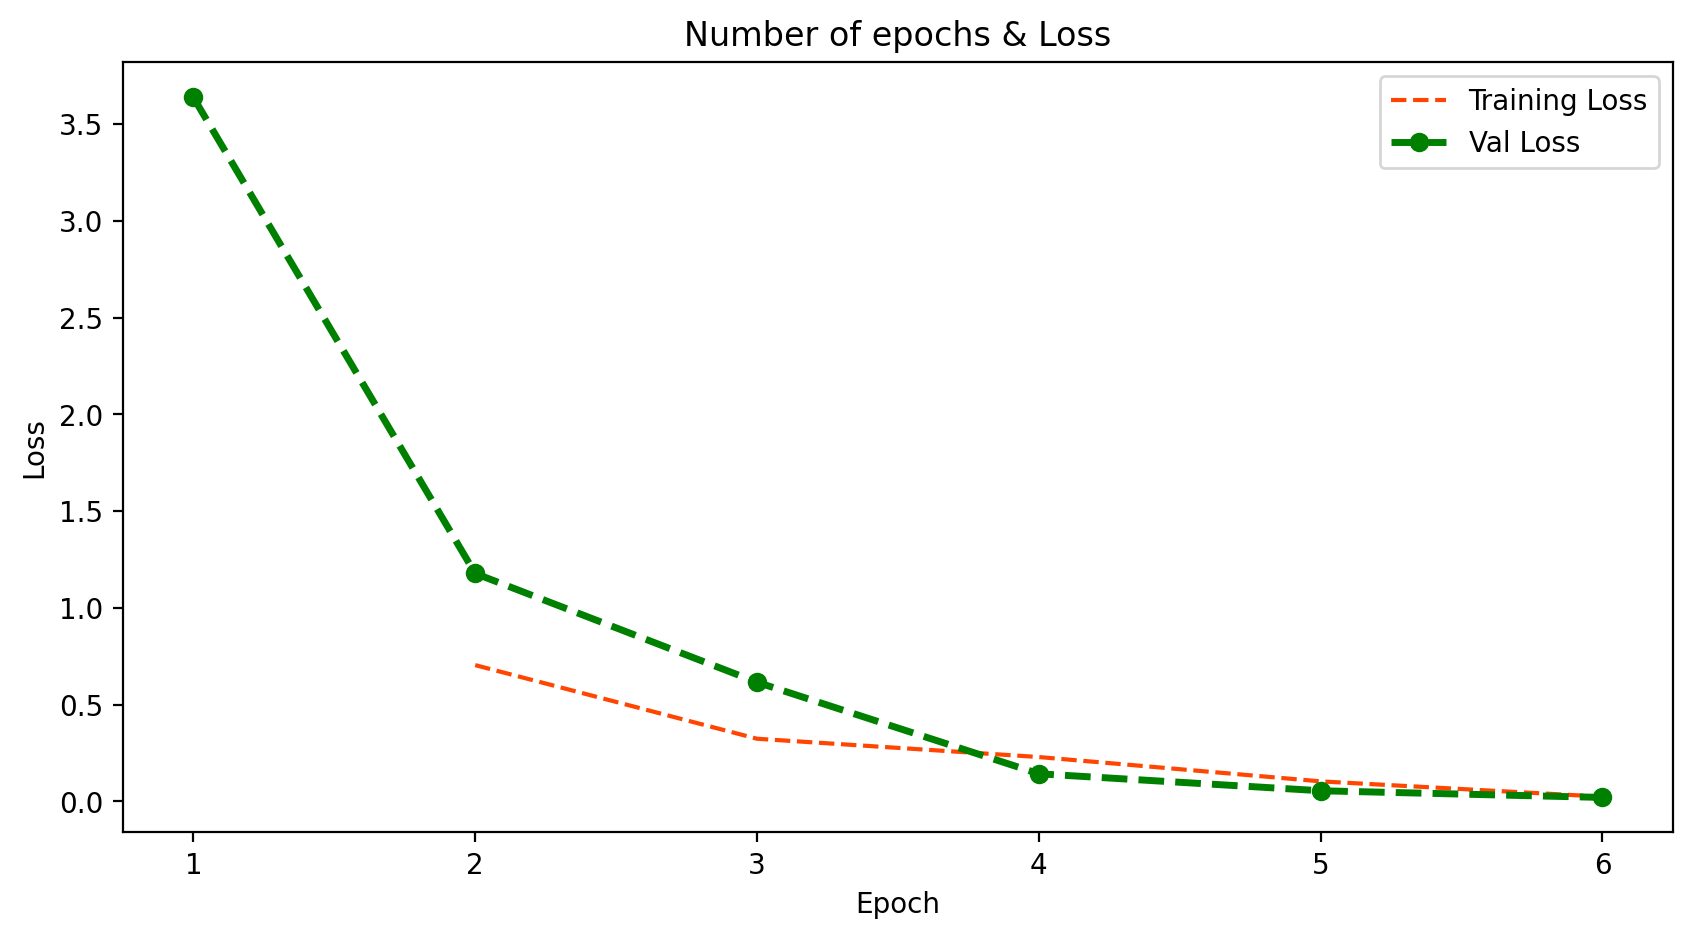

In [36]:
epoch_count = range(1,7)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, train_loss, 'r--', color= 'orangered')
plt.plot(epoch_count, val_loss, '--bo',color= 'green', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,7,1))
plt.show();

/tmp/ipykernel_31/4227686868.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epoch_count, val_acc, '--bo',color= 'green', linewidth = '2.5', label='line with marker')


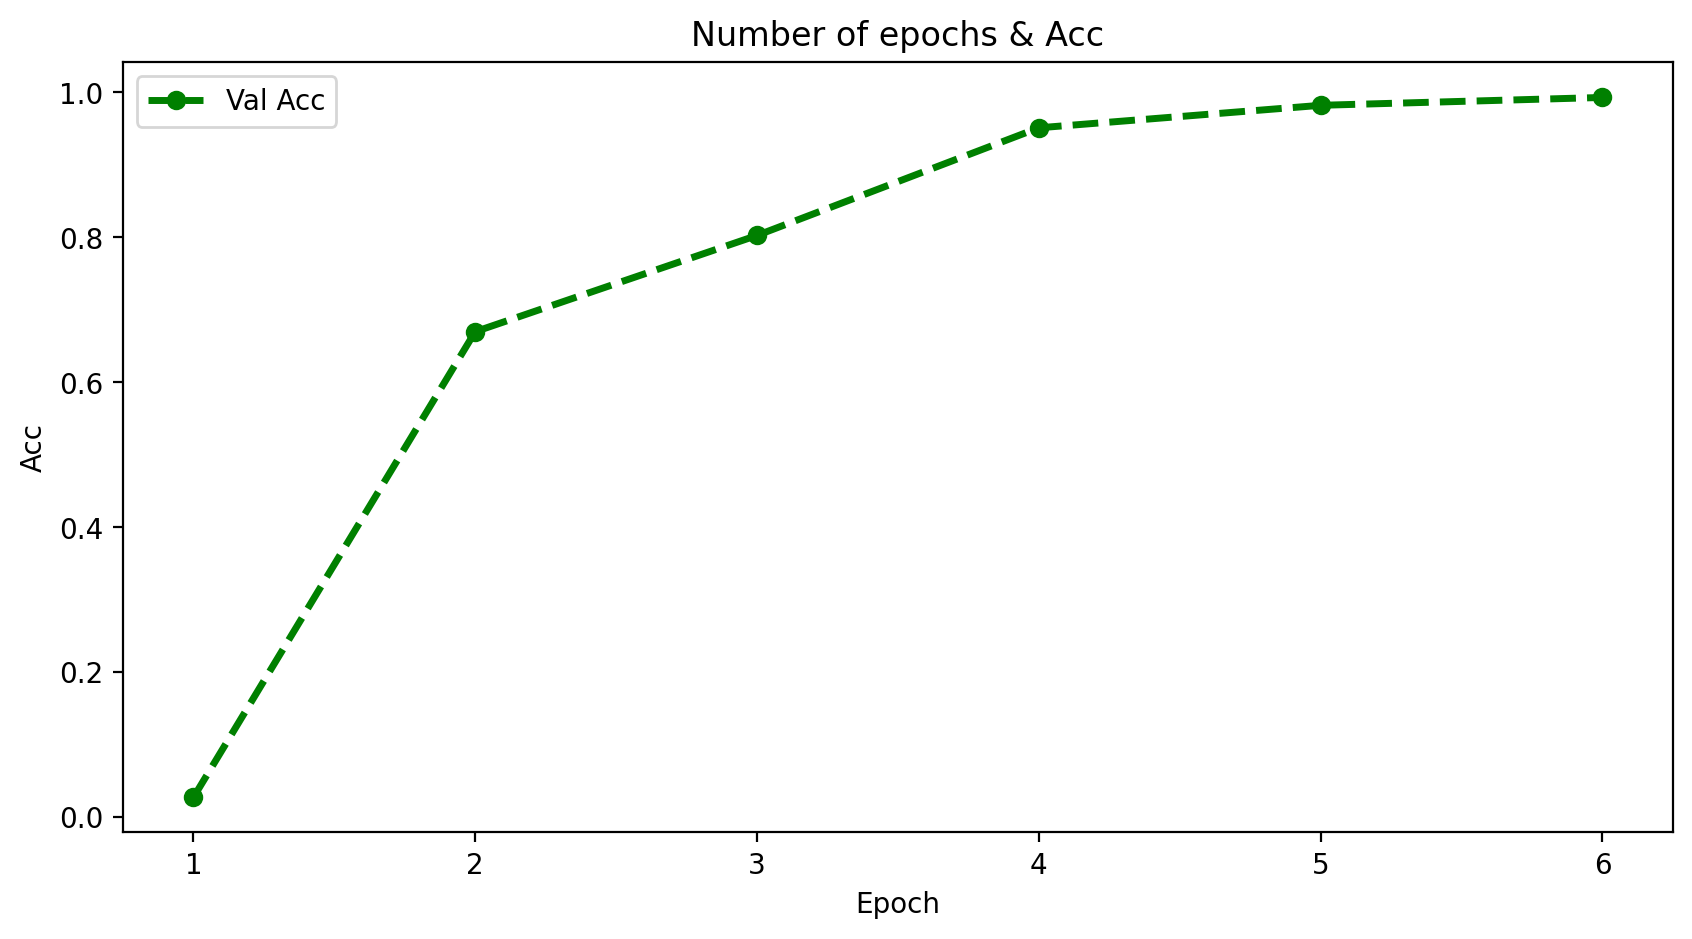

In [37]:
epoch_count = range(1,7)
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, val_acc, '--bo',color= 'green', linewidth = '2.5', label='line with marker')
plt.legend(['Val Acc'])
plt.title('Number of epochs & Acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,7,1))
plt.show();

In [38]:
test = ImageFolder(test_dir, transform=transforms.ToTensor())
test_images = sorted(os.listdir(test_dir + '/test'))
print(test_images)
print(len(test_images))

['AppleCedarRust1.JPG', 'AppleCedarRust2.JPG', 'AppleCedarRust3.JPG', 'AppleCedarRust4.JPG', 'AppleScab1.JPG', 'AppleScab2.JPG', 'AppleScab3.JPG', 'CornCommonRust1.JPG', 'CornCommonRust2.JPG', 'CornCommonRust3.JPG', 'PotatoEarlyBlight1.JPG', 'PotatoEarlyBlight2.JPG', 'PotatoEarlyBlight3.JPG', 'PotatoEarlyBlight4.JPG', 'PotatoEarlyBlight5.JPG', 'PotatoHealthy1.JPG', 'PotatoHealthy2.JPG', 'TomatoEarlyBlight1.JPG', 'TomatoEarlyBlight2.JPG', 'TomatoEarlyBlight3.JPG', 'TomatoEarlyBlight4.JPG', 'TomatoEarlyBlight5.JPG', 'TomatoEarlyBlight6.JPG', 'TomatoHealthy1.JPG', 'TomatoHealthy2.JPG', 'TomatoHealthy3.JPG', 'TomatoHealthy4.JPG', 'TomatoYellowCurlVirus1.JPG', 'TomatoYellowCurlVirus2.JPG', 'TomatoYellowCurlVirus3.JPG', 'TomatoYellowCurlVirus4.JPG', 'TomatoYellowCurlVirus5.JPG', 'TomatoYellowCurlVirus6.JPG']
33


In [39]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

In [40]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight
Label: PotatoHealthy1.JPG , Predicted: Potato___h

In [43]:
torch.save(model.state_dict(), 'plant_disease_model.pth')